### Här ska jag testa implementera 3 olika metoder
Jag har ej uppdaterat requirements, får kolla på det senare

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import cv2 
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

In [7]:
df_train = pd.read_csv('data/emnist-balanced-train.csv')
df_test = pd.read_csv('data/emnist-balanced-test.csv')

X_train = df_train.drop(columns=['label'])
y_train = df_train['label']

X_test = df_test.drop(columns=['label'])
y_test = df_test['label']

# KNN

In [8]:
clf = KNeighborsClassifier(n_neighbors=5)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Noggrannhet: {accuracy}')

Noggrannhet: 0.7570212765957447


## RandomForest

In [4]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Noggrannhet: {accuracy}')

Noggrannhet: 0.949


## TESTING TESTING

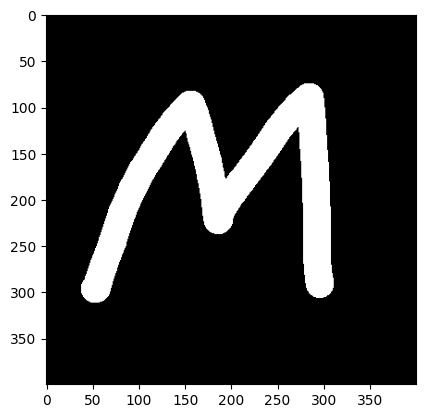

In [57]:
file = "drawn_images/20240605_165511.png"
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
_, thresholded_image = cv2.threshold(test_image, 127, 255, cv2.THRESH_BINARY)
inverted_image = 255 - thresholded_image


plt.imshow(inverted_image, cmap='gray')
plt.show()

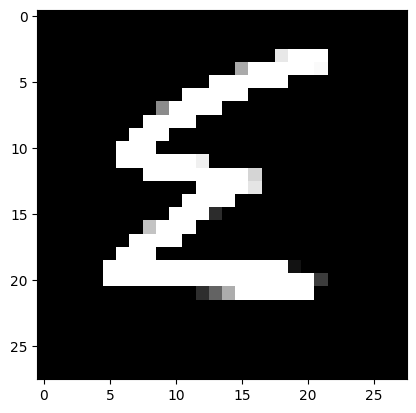

In [58]:
# Format Image
img_resized = cv2.resize(test_image, (28, 28), interpolation=cv2.INTER_LINEAR)
img_resized = cv2.bitwise_not(img_resized)
rotated_image = rotate(img_resized, 90)
mirrored_image = cv2.flip(rotated_image, 0)

# Preview reformatted image
plt.imshow(mirrored_image, cmap='gray')

In [59]:
img_flattened = mirrored_image.reshape(1, -1)
y_pred = clf.predict(img_flattened)

label_map = {
0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 
11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 
21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 
31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 
41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'
}

print(f'Predicted label: {label_map[y_pred[0]]}')

Predicted label: M


c:\Users\Jensh\Desktop\utbildning\kurs5\Teckenigenkanning\teckenigenk-nning-g1\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
